These are study notes from the book [Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do), by Andreas C. Müller and Sarah Guido. As machine learning and Python are currently new to me, I found useful to write down the code and some discussions presented on the book. The material below, except some notes done by myself, is taken from the chapter two, "Supervised Learning".

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import IPython
import IPython.display
import pandas as pd
import wand.image

X.shape: (26, 2)


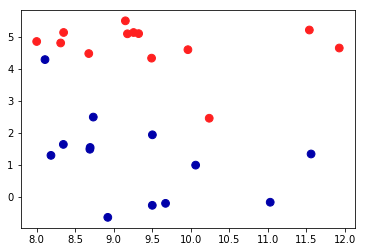

In [3]:
# Generate dataset

X, y = mglearn.datasets.make_forge()
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
print("X.shape: %s" % (X.shape,))
plt.show()

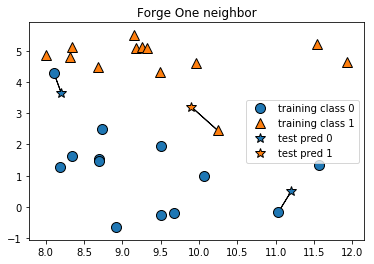

In [4]:
# One nearest neighbor

mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title("Forge One neighbor")
plt.show()

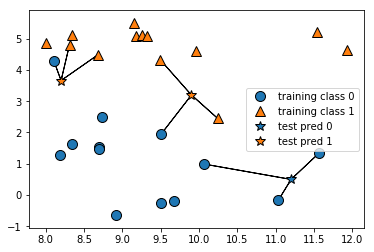

In [5]:
# Three nearest neighbors
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

In [6]:
## Applying the k nearest neighbors algorithm using scikit-learn

# First we split the dataset we generated before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Now import and instantiate the class. This is when we set parameters.
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Now we fit the classifies using the training set. For KNeighborsClassifier this
# means storing the data set, so we can compute neighbors during predictions.
clf.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [7]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [8]:
print(X_test)
print(y_test)

[[ 11.54155807   5.21116083]
 [ 10.06393839   0.99078055]
 [  9.49123469   4.33224792]
 [  8.18378052   1.29564214]
 [  8.30988863   4.80623966]
 [ 10.24028948   2.45544401]
 [  8.34468785   1.63824349]]
[1 0 1 0 1 1 0]


In [9]:
# Evaluating how well the model generalizes: score method with the test 
# data together with the test labels.
clf.score(X_test, y_test)

0.8571428571428571

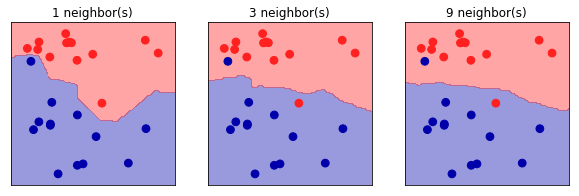

In [10]:
# Analyzing KNeighborsClassifier. Visualization of the decision boundary for
# one, three and five neighbors.
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%d neighbor(s)" % n_neighbors)
    
    
plt.show()

In [11]:
# Using single neighbor results in a decision boundary that follows the training data set closely (complex model),
# and more neighbors leads to a smoother decision boundary (simple model).

# Let's investigate this feature  with the real world breast cancer data set.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [12]:
cancer['data']

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [13]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [14]:
cancer['target_names']

array(['malignant', 'benign'], 
      dtype='<U9')

In [15]:
print(np.bincount(cancer.target))
print(cancer['target_names'])

[212 357]
['malignant' 'benign']


In [16]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [17]:
cancer.data.shape

(569, 30)

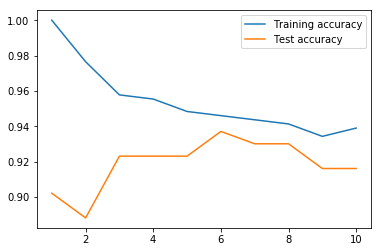

In [18]:
# Training-test split.
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Plotting accuracy versus neighbors.
training_accuracy = []
test_accuracy = []
# Try n_neighbors from 1 to 10.
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # Build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Record training set accuracy. Append a single item to the end of the bytearray.
    training_accuracy.append(clf.score(X_train, y_train))
    # Record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
    
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.legend()
plt.show()

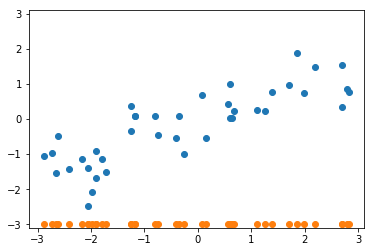

In [19]:
## k-NEIGHBORS REGRESSION
# Wave data set. 
X, y = mglearn.datasets.make_wave(n_samples=40)
# The wave data set only has a single input feature, and a continuous target variable.
plt.plot(X,y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-3.1, 3.1)
plt.show()

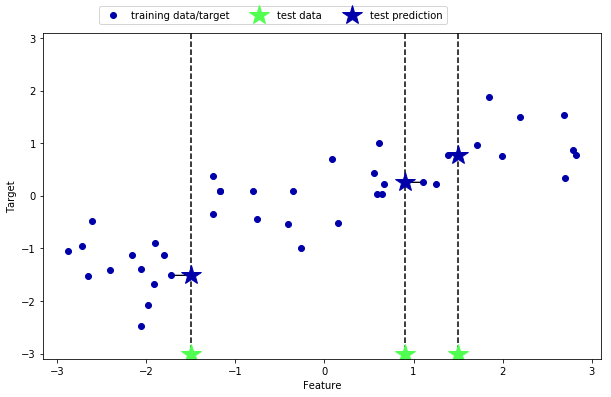

In [20]:
# One nearest neighbor.
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()

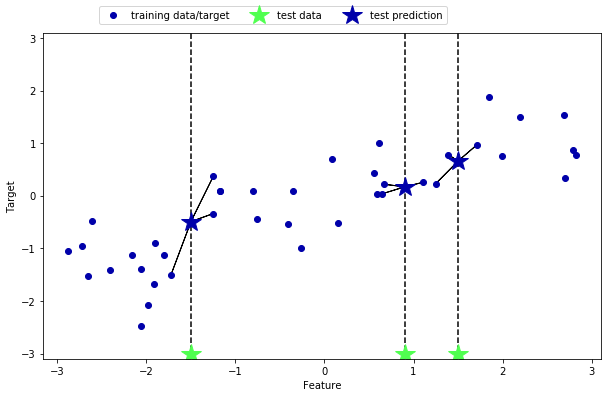

In [21]:
# When using multiple nearest neighbors for regression, the prediction is the average of the
# relevant neighbors.
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

In [22]:
# The k nearest neighbors algorithm for regression is implemented in the KNeighbors
# Regressor class in scikit-learn.

from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# Split the wave data set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model.
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model using the training data and training targets.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [23]:
# Now we can make prediction on the test set.
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [24]:
# Score method for evaluation.
reg.score(X_test, y_test)
# For regressors he score method returns the R² score. The R² score, aldso known
# as the coefficient of determination, is a measure of goodness of a prediction for
# a regression model and yields a score from 0 up to 1. A value of 1 corresponds to
# a perfect prediction while 0 corresponds to a constant model that just predicts
# the mear of the training set responses y_train.

0.83441724462496036

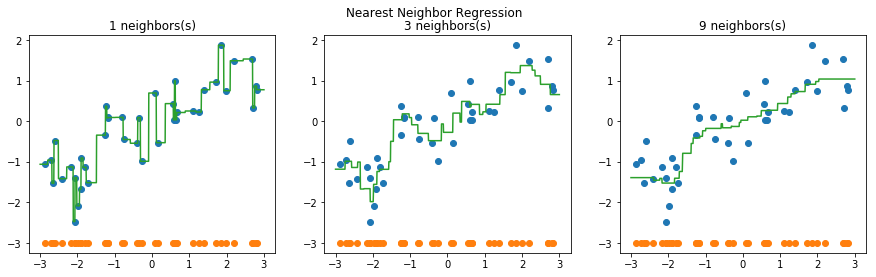

In [25]:
# Analyzing k nearest neighbors regression

fig, axes = plt.subplots(1, 3, figsize=(15,4))
# Create 1000 data point, evenly spaced between -3 and 3.
line = np.linspace(-3, 3, 1000).reshape(-1,1)
# Make sure to check out linspace and reshape documentation from the numpy library.
# linspace: "Return evenly spaced numbers over a specified interval"
# reshape: "Gives a new shape to an array without changing its data"
plt.suptitle("Nearest Neighbor Regression")

for n_neighbors, ax in zip([1, 3, 9], axes):
        # Make predictions using 1, 3 and 9 neighbors.
        reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X,y)
        # The original data
        ax.plot(X, y, 'o')
        ax.plot(X, -3 * np.ones(len(X)), 'o')
        # The predictions
        ax.plot(line, reg.predict(line))
        ax.set_title("%d neighbors(s)" % n_neighbors)
        
plt.show()

# Using only a single neighbor, each int in the training set has an obvious influence on the
# predictions and the predicted values go through all data points, which leads to a very
# unsteady prediction. Considering more neighbors leads to smoother predictions.

In [26]:
from IPython.external import mathjax
from IPython.display import display, Math, Latex
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

w[0]: 0.393906  b: -0.031804


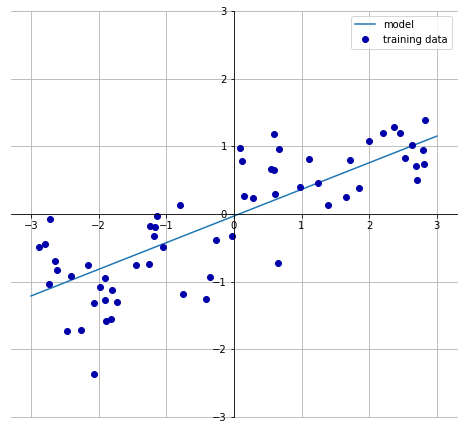

In [27]:
## LINEAR MODELS FOR REGRESSION

# For a data set with a single feature as wage: y = w[0]*x[0] + b
mglearn.plots.plot_linear_regression_wave()
plt.show()
# Linear models for regression can be characterized as regression models for which the prediction is 
# a line for a single feature, a plane for two features, or a hyperplane in higher dimensions.

In [28]:
# LINEAR REGRESSION aka ORDINARY LEAST SQUARES

# Linear regression finds the parameters w and b that minimize the mean squared error 
# between predictions and the true regression target on the training set.

from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [29]:
# The slope coefficients are stored in the coef_ attribute and the intercep in the intercept_
print("LR Coefficient: %s" % lr.coef_)
print("LR Intercept: %s" % lr.intercept_)

LR Coefficient: [ 0.39390555]
LR Intercept: -0.0318043430268


In [30]:
# Testing performance.
print("Training set score: %f" % lr.score(X_train, y_train))
print("Test set score: %f" % lr.score(X_test, y_test))
# The score on training and test set are very close: we are likely underfitting.

Training set score: 0.670089
Test set score: 0.659337


In [31]:
# Boston Housing data set. A more complex case: 506 samples and 105 features.
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

# Comparing the training set and test set score, we see a clear sign of overfitting.
print("Training set score: %f" % lr.score(X_train, y_train))
print("Test set score: %f" % lr.score(X_test, y_test))

# We should try to find a model that allows us to control complexity.

Training set score: 0.952353
Test set score: 0.605775


In [32]:
# RIDGE REGRESSION
# The coefficients w are chosen not only so thath they predict well on the training data, 
# but there is an additional constraint: their magnitude must be as small as possible.
# This constrain is an example of what is called regularization. 
# Regularization means explicitly restricting a model to avoid overfitting.
# Ridge Regression: L2 regularization.

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: %f" % ridge.score(X_train, y_train))
print("Test set score: %f" % ridge.score(X_test, y_test))

# With linear regression, we were overfitting to our data. Ridge is a more restricted
# model, so we are less likely to overfit. A less complex model means worse performance
# on the training set, but better generalization.

Training set score: 0.886058
Test set score: 0.752714


In [33]:
# The Ridge model makes a trade-off between the simplicity of the model and its performance
# on the training set.: alpha parameter. Default = 1. 
# Increasing alpha forces coefficients to move more towards to zero, which might help generalization.
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: %f" % ridge10.score(X_train, y_train))
print("Test set score: %f" % ridge10.score(X_test, y_test))

Training set score: 0.788346
Test set score: 0.635897


In [34]:
# Decreasing alpha allows the coefficients to be less restricted. For very small value of
# alpha, coefficients are barely restrict at all, and we end up with a model that 
# resembles LinearRegression.
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: %f" % ridge01.score(X_train, y_train))
print("Test set score: %f" % ridge01.score(X_test, y_test))
# Here alpha equals to 0.7 seems to be working well, we could try decreasing even more
# to improve generalization.

Training set score: 0.928578
Test set score: 0.771793


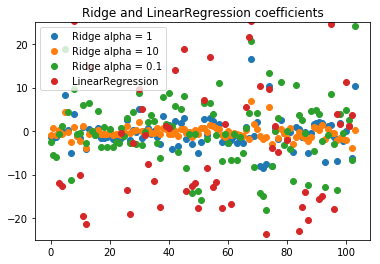

In [35]:
plt.title("Ridge and LinearRegression coefficients")
plt.plot(ridge.coef_, 'o', label="Ridge alpha = 1")
plt.plot(ridge10.coef_, 'o', label="Ridge alpha = 10")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha = 0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.ylim(-25, 25)
plt.legend()
plt.show()
# The x-axis enumerates the entries of coef_: x=0 shows the coefficient associated
# with the first feature, x=1 shows the one associated with the second feature  and so on.

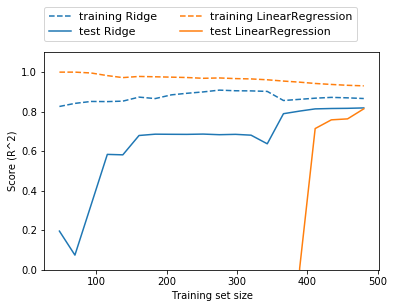

In [36]:
# Another way to understand the influence of regularization is to fix a value of alpha,
# but vary the amount of training data available.
mglearn.plots.plot_ridge_n_samples()
# The Boston Housing data set were sub sampled and LinearRegression and Ridge(alpha=1) were
# evaluated on subsets on increasing size.
# Note the Linear Regression's accuracy is acceptable only for a training set with 75% or more
# samples from the total data.
# ---> With enough training data, regularization becomes less important and given enough data,
# ridge and linear regression will have the same performance.
# ---> The decrease in training performance for linear regression: if more data is added, it
# becomes harder for a model to overfit, or memorize the data.
plt.show()
# Plots that show model performance as a function of the data set site are called LEARNING CURVES.

In [37]:
# LASSO
# An alternative to Ridge for regularizing linear regression. It also restricts coefficients
# to be close to zero, but in a slightly different way, called L1 regularization.

# In the L1 regularization, some coefficients are exactly zero. Some features are entirely
# ignored by the model. This can be seen as a form of automatic feature selection.
# If some coefficients are zero, the model can easier to interpret and can reveal its most
# important features.

from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

print("Training set score: %f" % lasso.score(X_train, y_train))
print("Test set score: %f" % lasso.score(X_test, y_test))
print("Number of features used: %d" % np.sum(lasso.coef_ != 0))

# Lasso does quite badly, both on the training and the test set --> we are underfitting.
# Only four of the 105 features were used.

Training set score: 0.293238
Test set score: 0.209375
Number of features used: 4


In [38]:
# Similarly to Ridge, Lasso also has a regularization parameter that controls how strongly
# coefficients are pushed towards zero. Default = 1.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
# We increased the fefault setting of "max_iter" in order to converge the model. We would be
# warned if we wouldn't do that.

print("Training set score: %f" % lasso001.score(X_train, y_train))
print("Test set score: %f" % lasso001.score(X_test, y_test))
print("Number of features used: %d" % np.sum(lasso001.coef_ != 0))

# The performance is slightly better than Ridge and we udes only 33 of the 105 features.

Training set score: 0.896507
Test set score: 0.765649
Number of features used: 33


In [39]:
# On the other hand, if we set alpha too low, the regularization effect is removed and we end
# up with overfitting, similar to LinearRegression.

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: %f" % lasso00001.score(X_train, y_train))
print("Test set score: %f" % lasso00001.score(X_test, y_test))
print("Number of features used: %d" % np.sum(lasso00001.coef_ != 0))

Training set score: 0.951061
Test set score: 0.640310
Number of features used: 94


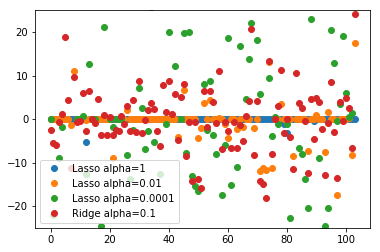

In [40]:
# Plotting the coefficients of the different models.
plt.plot(lasso.coef_, 'o', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 'o', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'o', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25)
plt.legend()
plt.show()

# Note the best Ridge solution has similar predicted performance to the Lasso model with
# alpha equals to 0.01, but with Ridge all the coefficients are non-zero, which leads to
# a quite unregularized model, more difficult to understand.

# In practice, Ridge regression is usually the first choice between them. However, if we
# have a large amount of features and expect only a few to be important, Lasso may be a
# better choice. Similarly, if you would like to have a model easier to interpret, Lasso
# could be a better choice, since it will select only a subset of the input features.

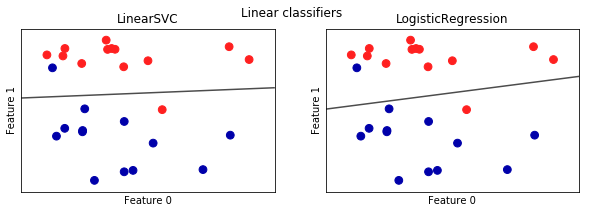

In [41]:
# LINEAR MODELS FOR CLASSIFICATION

# Logistic regression and Linear Support Vector Machines are the two most common
# linear classification algorithms.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))
plt.suptitle("Linear classifiers")

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%s" % clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
   
       
plt.show()

# x axis: first feature of the forge data set.
# y axis: second feature of the forge data set.
# line: decision boundary
# By default, both models apply an L2 regularization, in the same way Ridge
# does for regression. Note the two models come up to similar decision boundaries.

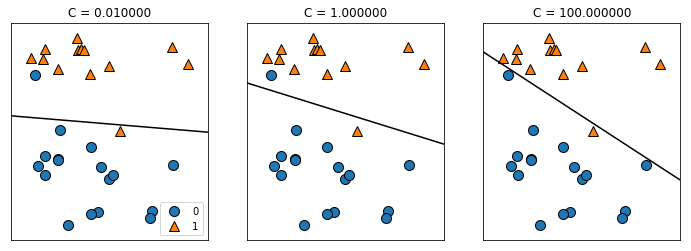

In [42]:
# For LogisticRegression and LinearSVC the trade-off parameter for the
# regularization strength is called C. Higher values of C correspond to 
# less regularization. That means with higher values of C, the implementations
# try to fit the training set as best as possible, while with low values the
# model put more emphasis on finding a coefficient vector close to 0.

mglearn.plots.plot_linear_svc_regularization()
plt.show()

# With low values of C the algorithms try to adjust to the "majority" of data
# points, while higher values stress the importance that each individual data
# point be classified correctly.

In [43]:
# Now let's analyze a data set with more features.

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)
logisticregression = LogisticRegression().fit(X_train, y_train)
print("Training set score: %f" % logisticregression.score(X_train, y_train))
print("Test set score: %f" % logisticregression.score(X_test, y_test))

# The default value C=1 provides quite good performance. As training and test
# performance are vey close, it is likely we are underfitting.

Training set score: 0.953052
Test set score: 0.958042


In [44]:
# We can try to increase C to fit a more flexible model.

logisticregression100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: %f" % logisticregression100.score(X_train, y_train))
print("Test set score: %f" % logisticregression100.score(X_test, y_test))

Training set score: 0.967136
Test set score: 0.965035


In [45]:
# Using a more regularized model than default C=1.
logisticregression001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: %f" % logisticregression001.score(X_train, y_train))
print("Test set score: %f" % logisticregression001.score(X_test, y_test))

Training set score: 0.934272
Test set score: 0.930070


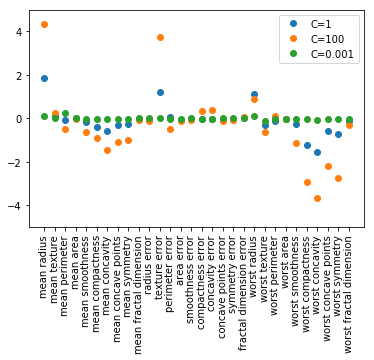

In [46]:
# We can take a look at the coefficients learned by the models with the three different
# settings of the regularization parameter.

plt.plot(logisticregression.coef_.T, 'o', label="C=1")
plt.plot(logisticregression100.coef_.T, 'o', label="C=100")
plt.plot(logisticregression001.coef_.T, 'o', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend()

plt.show()

# As LogisticRegression applies a L2 regularization by default, the result
# looks similar to Ridge. Strong regularization pushes coefficients more and
# more towards 0, though coefficients never become exactly 0.

# The interpretations of coefficients of linear models should always be skeptical. As 
# a example take a look to the coefficient related to the feature "Mean Perimeter". Note 
# its sign depends on the choice of the regularization parameter. One might think the 
# feature "Mean Perimeter" is associated with "benign", while someone else could associate
# it with "malignant".

L1 LogisticRegression. Training accuracy with C=0.001000: 0.913146
L1 LogisticRegression. Test accuracy with C=0.001000: 0.923077


L1 LogisticRegression. Training accuracy with C=1.000000: 0.960094
L1 LogisticRegression. Test accuracy with C=1.000000: 0.958042
L1 LogisticRegression. Training accuracy with C=100.000000: 0.985915
L1 LogisticRegression. Test accuracy with C=100.000000: 0.979021


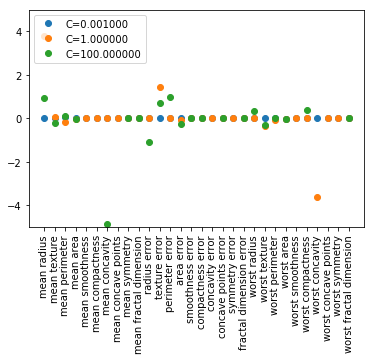

In [47]:
# A more interpretable model can be done with L1 regularization, as it limits the model
# to only a few features (some coefficients are set to zero).

for C in [0.001, 1, 100]:
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("L1 LogisticRegression. Training accuracy with C=%f: %f"
          % (C, lr_l1.score(X_train, y_train)))
    print("L1 LogisticRegression. Test accuracy with C=%f: %f" 
          % (C, lr_l1.score(X_test, y_test)))
    
    plt.plot(lr_l1.coef_.T, 'o', label="C=%f" % C)
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

plt.ylim(-5, 5)
plt.legend(loc=2)
plt.show()

In [48]:
# LINEAR MODELS FOR MULTICLASS CLASSIFICATION

# Many linear classification models are binary models and do not extend naturally to the multi-class
# case (with the exception of Logistic regression). A common technique to extend a binary classification
# algorithm to a multi-class classification algorithm is the one-vs-rest approach.

# One-vs-rest approach: a binary model is learned for each class, which tries to separate this class
# from all other classes, resulting in as many binary models as there are classes.

# To make a prediction, all binary classifiers are tun on a test point. The one which has the highest 
# score on its single class "wins" and this class label is returned as a prediction.

# Having one binary classifier per class results in having one vector of slops and a intercept for each
# class. The mathematics behind logistic regression are somewhat different from the one-vs-rest approach, 
# but they also result in one coefficient vector and intercept per class and the same method of prediction
# is applied.

# As a example, a two-dimensional data set will be used, where each class (three in this case) is given
# by data sampled from a Gaussian distribution.

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)

# We can check that our target array is not binary anymore. In this case there are three target values.
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 2, 0])

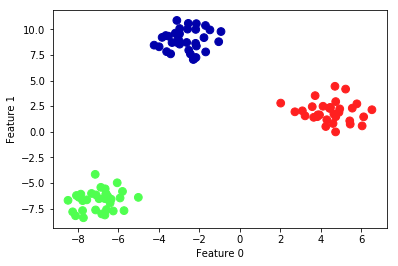

In [49]:
# The data is constructed in order to present three gaussian classes. The groups below are naturally 
# around its respective distribution mean.

plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [50]:
# LinearSVS classifier on the data set.

linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


In [51]:
# The shape of coef_ is (3,2). Each row of coef_ contains the coefficient vector for one of the
# three classes. Each row has two entries, corresponding to the two features in the data set. The
# intercept_ is now a one dimensional array, storing the intercepts for each class.

print(linear_svm.coef_)
print(linear_svm.intercept_)

[[-0.17492004  0.23140517]
 [ 0.47621118 -0.06936674]
 [-0.18913918 -0.20400567]]
[-1.07745398  0.13140507 -0.08604903]


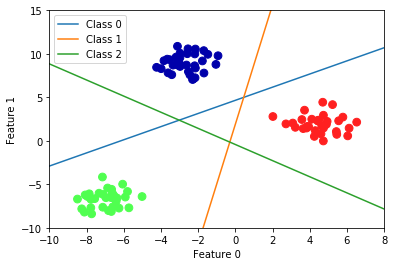

In [52]:
# Visualizing the lines by the three binary classifiers.

plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
line = np.linspace(-15, 15)

for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
    # Hint: z = ax + by + c with z=0.
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

# Note all the points belonging to Class 0 in the training data are above the line corresponding
# to class 0, which means they are on the class 0 side of the binary classifier. These points are
# the lines corresponding to Class 1 and Class 2, which means they are classified as "rest" by
# the binary classifier to class 1 and by the binary classifier to class 2. The other decision
# boundaries follow the same idea.

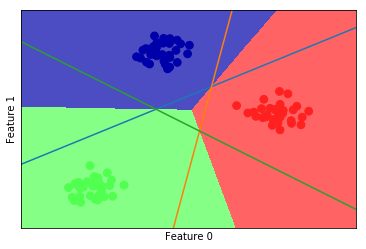

In [53]:
# What about the triangle in the middle of the plot? All three binary classifiers classify points there
# as "rest". Which class would a point there be assigned to? The one with the highest value for the
# classification formula: the class of the closest line.

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [54]:
# STRENGTHS, WEAKNESSES AND PARAMETERS

# The regularization parameter is the main parameter of linear models, called alpha in the
# regression models and C in LinearSVC and LogisticRegression. Large alpha and small C mean
# simple models.

# In particular for the regression models, tuning this parameter is quite important. Usually C
# and alpha are searched for on a logarithmic scale.

# Other decision to make: L1 or L2 regularization. If it is assumed only a few features are
# actually important, L1 should be used. Otherwise, L2 should be used.

# Linear models are fast to train and also fast to predict. They scale to very large data sets
# and work well with sparse data. If there are hundreds of thousands or millions of samples, the
# libraries SGDClassifiers ans SGDRegressor might be investigated. They implement more scalable
# version of the linear models.

# Linear models make relatively easy to understand how a prediction is made, but it is often not
# entirely clear why coefficients are the way they are. This is particularly true if the data
# set has highly correlated features. In these cases the interpretation of the coefficients
# might be hard.

# They often perform well when the number of features is large compared to the number of
# samples. Linear models are also often used on very large data sets, simply because other
# models are not feasible to train. However, on smaller data set other models might yield better
# generalization performance.

In [55]:
# NAIVE BAYES CLASSIFIERS

# Naive Bayes classifiers are a family of classifiers quite similar to the linear models
# discussed.

# Naive Bayes classifiers: faster in training. The price for that: generalization performance
# slight worse than linear classifiers like LogisticRegression and LinearSVC.

# Why naive Bayes models are faster? The learn parameters by looking each feature individually
# and collect simple per-class statistics from each feature.

# Naive Bayes classifiers implemented in scikit-learn:
# GaussianNB: applied to any continuous data
# BernoulliNB: assumes binary data
# MultinomialNB: assumes count data

# Take a look at Naive Bayes Classifiers on the book for a more detailed discussion.

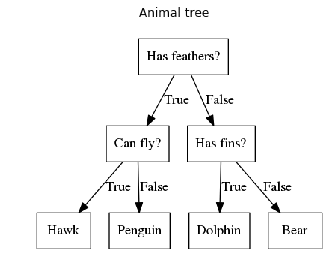

In [56]:
# DECISION TREES

# Widely used for classification and regression tasks. Essentially, the learn a hierarchy of
# if-else questions, leading to a decision.

# In this illustration each node in the tree either represents a question ou a terminal node (also
# called a leaf) which contains the answer.

mglearn.plots.plot_animal_tree()
plt.suptitle("Animal tree")
plt.show()

# Here we want to distinguish between four animals: bears, hawks, penguins and dolphins. In 
# machine learning parlance, we built a model distinguish between four classes of animals 
# using the three features "has feathers", "can fly" and "has fins".

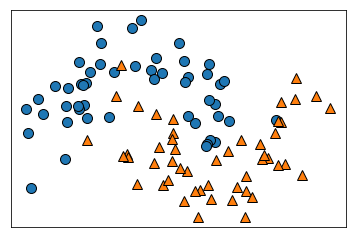

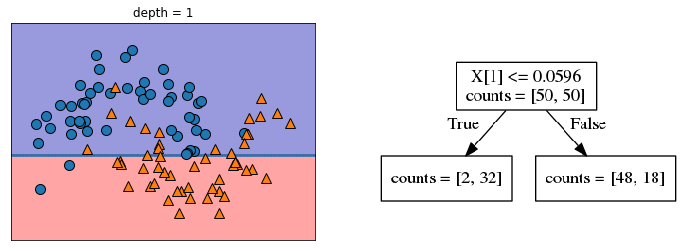

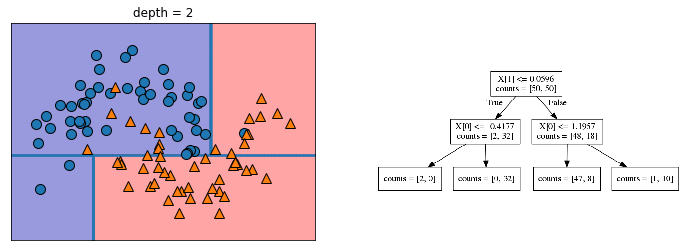

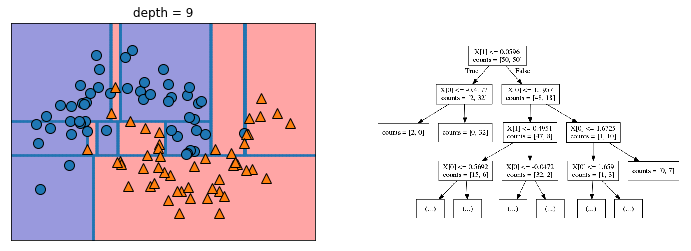

In [57]:
# BUILDING DECISION TREES

# The data set we are going to use consists of two half-moon shapes, with each class consisting 
# of 50 data points.

mglearn.plots.plot_tree_progressive()
plt.show()

# Usually data does not come in the form of binary yes/no features as in the animal example.

In [58]:
# Learning a decision tree means learning a sequence of if/else questions that gets us to the
# true answer most quickly. In Machine Learning these questions are called tests.

# The tests used on continuous data are of the form "is feature i larger than value a?". To build 
# a tree, the algorithm searches over all possible test and find the most informative one about
# the target variable.

# 1) Root: the top node representing the data set: 50 belonging to class 0 and 50 to class 1.
# 2) depth=1: the first split is done by testing whether x[1] <= 0.0596. If the test is true, a
# point is assigned to the left node, which contains 2 points belonging to class 0 and 32 points
# to class 1. Otherwise, a to the right node, which contains 48 points belonging to class 0 and 18 points
# to class 1.
# 3) depth=2: even though the first split did a good job, the bottom region contain points belonging to
# class 0 and top region still contains points belonging to class 1 --> a more accurate model is built 
# by repeating the process of looking for the best test in both regions (what do they mean about best 
# test?).

# The recursive procedure yields a binary tree of decision, with each node containing a test. Alternatively, 
# one can think of each test as splitting part of the data that is being currently being considered along 
# a axis. This yields a view of the algorithm as building a hierarchical partition.

# The recursive partitioning is repeated until each region in the partition (each leaf in the decision tree)
# only contains a single target value (a single class or a single regression value)

# If a leaf contains only data points with the same target values it is called pure.

# A prediction on a new data point is made by checking which region of the feature space partition the point
# lies in and then predicting the majority target in that region.

In [59]:
# CONTROLLING COMPLEXITY OF DECISION TRESS

# Typically, building a tree as described and continuing until all leaves are pure leads to very complex
# models and highly overfit the training data. Take a good look in the final plot and note red regions around
# blue points and vice-versa. The decision boundary focuses a lot on single outlier points far from other
# points in that class.

# Preventing overfitting:
# 1) Pre-pruning: stop the creation of the tree before it is ended.
# 2) Post-pruning or pruning: build the tree, but removing or collapsing nodes with little information. 

# Pre-pruning stop criteria: one could limit he maximum depth of the tree, limit the maximum number of leaves
# or requiring a minimum number of points in a node to keep splitting ir.

# Scikit-learn only implements pre-pruning.

# Example: breast cancer data set using the default setting of fully developing the tree (until it is pure).

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
# We fix random_state, which is used for tie-breaking internally. Take a look in the documentation.
tree.fit(X_train, y_train)

print("Accuracy on training set: %f" % tree.score(X_train, y_train))
print("Accuracy on test set: %f" % tree.score(X_test, y_test))

# Since all the leaves are pures, the accuracy on the training set is 100%, as expected. On the 
# training set is slightly worse than the linear models presented earlier.

Accuracy on training set: 1.000000
Accuracy on test set: 0.937063


In [60]:
# Pre-pruning. We set max_depth=4: only four consecutive questions can be asked.

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: %f" % tree.score(X_train, y_train))
print("Accuracy on test set: %f" % tree.score(X_test, y_test))

# Limiting the depth of the tree decreases overfitting.

Accuracy on training set: 0.988263
Accuracy on test set: 0.951049


In [61]:
# ANALYZING DECISION TREES

# export_graphviz: writes a file in the dot format, which is a text file format for
# for storing graphs.

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

# We set a option to color the nodes to reflect the majority class in eah node and pass the 
# class and features names so the tree can be properly labeled.

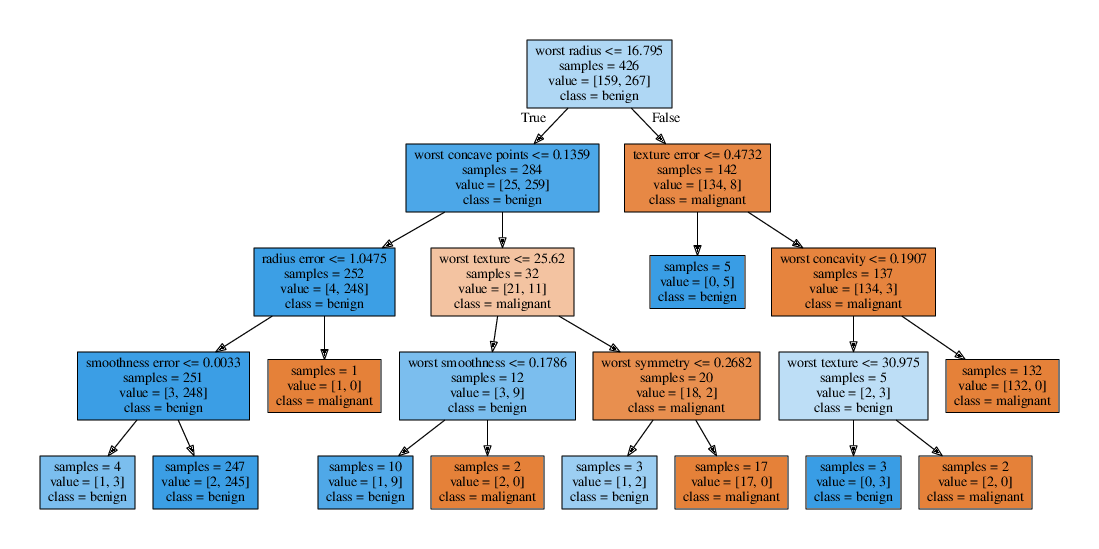

In [62]:
# The dot file can be read and visualized by the graphviz module.

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
    # Below we create a file called "Source.gv.pdf"
    graphviz.Source(dot_graph)
    
# To show the pdf file directly in the Jupyter Notebook, without transforming the file to PNG, we make
# use of the Wand library.

from wand.image import Image as WImage
WImage(filename='Source.gv.pdf')

# Visualizing trees provide a great-in-depth view of how the algorithm makes predictions 
# and it is a good example of a machine learning algorithm you can easily explain
# to non-experts.

# Note even a tree with depth four, as seen above, can become a bit overwhelming. Deeper
# tress (depth ten is not uncommon) are even harder to grasp.

# An useful inspecting method is to find out which path most of the data actually takes. 

# The n_samples shown in the figure gives the number of samples in each node, while
# values provides the number of samples per class.

# Note the first split separate the classes fairly well: [25, 259], [134,8].

In [63]:
# FEATURE IMPORTANCE IN TREES

# Instead of looking at the whole tree, there are some useful statistics to derive some
# of its properties.

# Feature importance: rates how important each feature if for the decision a tree makes. It
# is a number between 0 and 1 for each feature. The number 0 means "not used at all" and 1
# means "perfectly predicts the target".

# All the feature importances always sum to 1.

tree.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.01019737,  0.04839825,  0.        ,  0.        ,  0.0024156 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.72682851,  0.0458159 ,  0.        ,  0.        ,  0.0141577 ,
        0.        ,  0.018188  ,  0.1221132 ,  0.01188548,  0.        ])

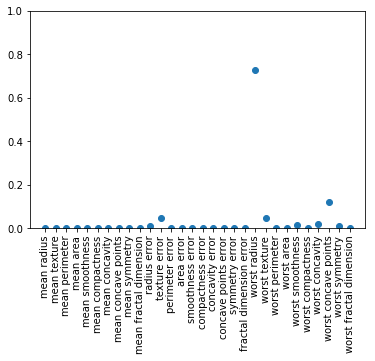

In [64]:
# Visualizing the feature importances.

plt.plot(tree.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(0, 1)
plt.show()

# We can see worst radius, used at the first split is, as expected, by far the most 
# important feature.

# However, it does not mean a feature with a low feature_importance coefficient is
# uninformative. It just means this features was not picked by the tree, likely because
# another feature encodes the same information.

Feature importances: [ 0.  1.]


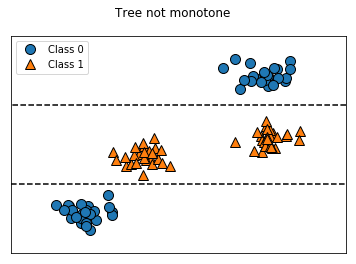

In [65]:
# Differently from linear models, feature_importance coefficients are always positive: they
# do not encode which class a feature is indicative of. 

# Below we make use of mglearn example data set to show the relation between features and 
# class might not be simple.
tree = mglearn.plots.plot_tree_not_monotone()
plt.suptitle("Tree not monotone")
plt.show()

# The plot shows a data set with two features and two classes. Here all the information is
# contained in X[1], and X[0] is not used a all. But the relation between X[1] and the
# output class is not monotonous, meaning it can be said "a high value of X[1] means class
# red and a low values means class blue" or the other way around.

In [66]:
# While the discussion were focused on decision trees for classification, the use
# and the analysis of regression trees, implemented by DecisionTreeeRegressor, are
# very similar.

# STRENGTHS, WEAKNESS AND PARAMETERS

# Usual parameters of decision trees for pre-pruning strategies: min_depth, 
# max_leaf_nodes, min_samples_leaf.

# Important advantage of decision trees: the algorithm is completely invariant to 
# scaling of the data. As each feature is processed separately and the possible
# splits do not depend on scaling, no pre-processing like normalization or 
# standardization of standardization is needed.

# In particular, decision tress work well when the data set have features on 
# completely different scales or a mix of binary and continuous features.

# The main down-side of decision trees is that they tend to overfit, even with the 
# use of pre-pruning, so they provide poor generalization performance. Therefore, in
# most application the ensemble methods are usually used in place of a single tree.

In [67]:
# ENSEMBLES OF DECISION TREE

# Ensembles combine multiple machine learning models to create more powerful models.

# There are many models in this category, but two ensemble models have proven to 
# be effective on a wide range of data set for classification and regression, and
# both of them use decision trees on the building block ----->
# Random Forests and Gradient Boosted Decision Trees.

In [68]:
# RANDOM FORESTS

# Random forests are essentially a collection of decision trees, where each tree
# is slightly different from the others.

# The idea: each tree might do a relatively good prediction job, but will likely
# overfit on part of the data. If many trees are built, all of which working well
# and overfitting in different ways, the amount of overfitting can be reduced by
# averaging the results.

# There are two randomize decision trees in a random forest: by selecting the data
# points used to built a tree and by selecting the features in each split test.

In [69]:
# BUILDING RANDOM FORESTS

# `n_estimator`: the parameter to set the number of trees in the random forest.

# Each tree is built with a bootstrap sample of the data. A bootstrap sample is constructed
# by random sampling with replacement of the data points. Then bootstrapping creates a data
# set as big as the original one, but some data points will be missing from it and some will
# be repeated.

# Next, a decision tree is built based on each new data set created by bootstrapping. However,
# in this context, the decision tree algorithm is slightly modified. Before, it searched for
# the best test for each node. In this context, it randomly selects in each node a subset
# of the features and looks for the best possible test involving one of these features.
# The quantity of selected features is controlled by the `max_features` parameter.

# This selection is repeated in each node, so each of them make a decision using a different
# features subset.

# Summary: two mechanism ensure different trees (randomness) in a random forest.
# 1) Bootstrap sampling: each decision tree is built on a slightly different data set.
# 2) Random features selection: in each node of a tree, each split operates on a different
# features subset.

# Note `max_features` is a critical parameter. If `max_features = n_features` no randomness
# is injected, while if `max_features = 1` the algorithm has no choice of which feature to test
# and can only search for thresholds for the randomly selected feature.

# Summary: high `max_features` leads to a forest with very similar trees, which will be able to
# easily fit the data, using the most distinctive features. Low `max_features` leads to a forest
# with quite different trees and each of them might need to be very deep in order to well
# fit the data.

# PREDICTION ON RANDOM FORESTS

# The algorithm first make a prediction for every tree in the random forest. 
# Regression: it averages these predictions to get the final one.
# Classification: it averages the probabilities predicted by each tree for each possible 
# output class and the class with the greater average probability is predicted.

In [70]:
# ANALYZING RANDOM FORESTS

# We construct for the `two_moon` data studied before, a five tree random forest.

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

# Make sure to take a look at RandomForestClassifier documentation to understand the
# parameters. From the documentation:

# "A random forest is a meta estimator that fits a number of decision tree classifiers
# on various sub-samples of the data set and use averaging to improve the predictive 
# accuracy and control over-fitting. The sub-sample size is always the same as the 
# original input sample size but the samples are drawn with replacement 
# if `bootstrap=True` (default)."

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

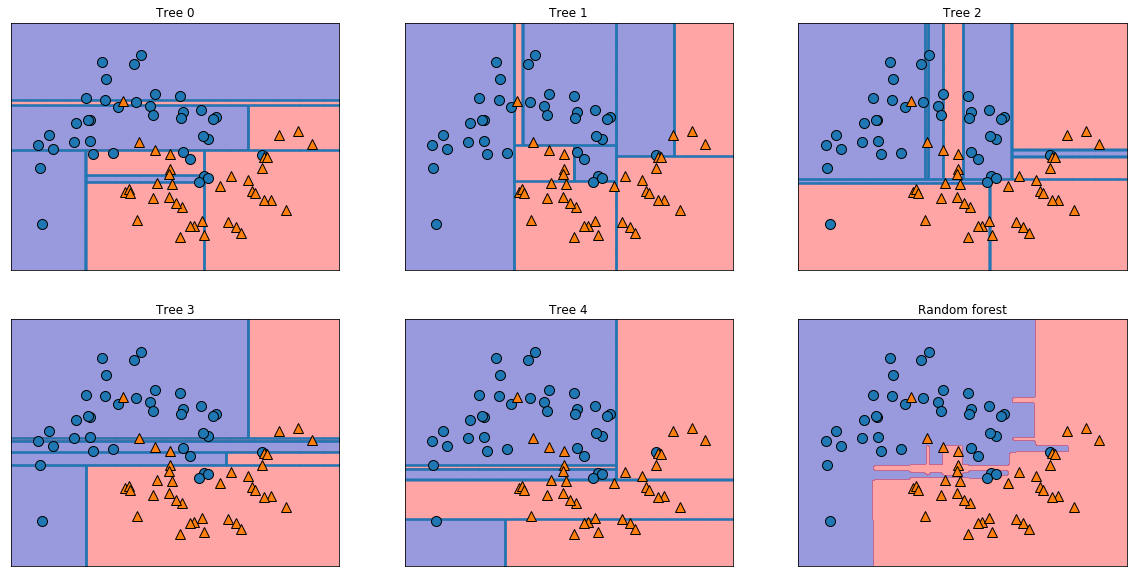

In [71]:
# The individual trees are stored in the `estimator_` attribute. Let's visualize the 
# decision boundaries learned by each tree, together with their aggregate prediction. In
# other words, the random forest prediction.

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
# The scatter plot could be done also by the line below:
# plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['b', 'r'])[y_train], s=60)

plt.show()

# Note the decisions learned by the five trees are quite different. Each of them makes some
# mistakes, as some of the training points plotted here were not included in the training
# set of the tree, due to bootstrap sampling.

# The random forest over-fits less than any of the trees individually and provides a much
# more intuitive decision boundary.

In [72]:
# In real applications many more tress are used, often hundreds or thousands, leading to
# even smoother boundaries.

# Applying a random forest of 100 tress on the breast cancer data set:

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: %f" % forest.score(X_train, y_train))
print("Accuracy on test set: %f" % forest.score(X_test, y_test))

# The random forest gives an accuracy of 97%, better than the linear models or a single 
# decision tree, without tuning any parameters. The `max_features` setting could be
# adjusted or it could be applied pre-pruning as it was done for a single tree. However, 
# often the default parameters already work quite well.

Accuracy on training set: 1.000000
Accuracy on test set: 0.972028


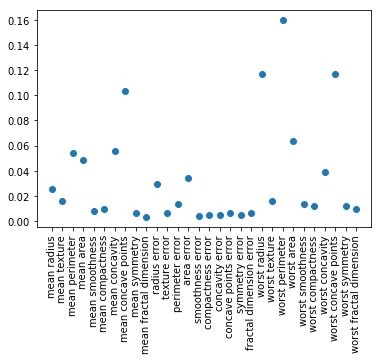

In [73]:
# The random forest also provides feature importances, which are computed by aggregating 
# the individual feature importances over the tress in the forest.

# Typically, feature importances provided by random forests are more reliable than the ones
# provided by a single tree.

plt.plot(forest.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.show()

# Note the random forest gives non-zero importance to many more features than a single tree.
# Similarly to the single decision tree, the "worst radius" is a important feature, but 
# the random forest actually chooses "worst perimeter" to be most relevant feature overall.

# The randomness in building a random forest forces the algorithm to consider many possible
# explanations, then a random forest captures a much broader picture of the data than a 
# a single tree.

In [74]:
# SOME OTHER CONSIDERATIONS ABOUT RANDOM FORESTS

# Random forests for regression and classification are currently among the most widely used
# machine learning methods. They are powerful, work well without tuning the parameters and
# do no require scaling od the data. Below we point some important parameters.

# `n_jobs` parameter: random forests on large data set might be somewhat time-consuming, but
# it can easily parallelized across CPU cores. Using more CPU cores will result in linear
# speed-ups. To use all cores in the computer set `n_jobs=-1".

# `random_state` parameter: set and fix it if reproducible results are desired. Random forests,
# by its nature, are random and setting different random states can drastically change the
# model. The more tress are in the forest, the more robust it will be against the choice of
# random state.

# `n_estimators` parameter: larger is always better because averaging mor tress will yield a
# more robust ensemble. However the are diminishing returns and more tress requires more
# memory and more time to train.

# `max_features` parameter: as mentioned above, smaller values reduces over-fitting. The
# default values and a good rule of thumb are `max_features=sqrt(n_features)` for
# classification and `max_features=log2(n_features)` for regression.

# `max_leaf_nodes` parameter: as `max_features` might sometimes improve performance. It can
# also drastically reduce memory and time requirements.

# Random forest do no tend to perform well on very high dimensional, sparse data, such as
# text data. For those linear models might be more appropriate.

# They work well on very large data sets and can be easily parallelized over CPU cores, but
# require more memory and are slower to train and to predict then linear models. If time and
# memory are very important, it might make sense to use linear models instead.

In [75]:
# GRADIENT BOOSTED REGRESSION TREES (GRADIENT BOOSTING MACHINES)

# Another ensemble method combining multiple decision trees to a more powerful model. Despite 
# its name, it can be used for regression and classification.

# It works by building trees in a serial manner, where each tree tries to corrected the mistakes
# of the previous one. There is no randomization. Instead, strong pre-pruning is used. It often
# uses very shallow trees, of depth one to five, making a faster model with less memory use.

# The main idea of gradient boosted: combine many simple models (known as weak learners) like 
# shallow trees. Each tree can provide good predictions only on part of the data, and more and
# more trees are added to iteratively improve performance.

# Gradient boosted trees are frequently the winning entries in machine learning competitions and
# are widely used in industry. They are generally a bit more sensitive to parameter settings than
# random forests, but can provide better accuracy if the parameters are set correctly (pre-pruning,
# number of trees in the ensemble and learning rate are the model most important features).

# `learning_rate` parameter: controls how strongly each tree tries to correct the mistakes of the 
# previous ones. High `learning_rate` means each tree make strong corrections, allowing for a more
# complex model. Similarly, adding more trees to the ensemble, `n_estimators also increases model
# complexity.

# Example of GradientBoostingClassifier on the breast cancer data set (with default values).

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
# Why a `random_state` is fixed on GradientBoostingClassifier if there is no randomization?
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [76]:
print("Accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("Accuracy on test set: %f" % gbrt.score(X_test, y_test))

# AS the training set accuracy is 100%, we are likely to be over-fitting.

Accuracy on training set: 1.000000
Accuracy on test set: 0.958042


In [77]:
# To reduce over-fitting we could apply strong pre-pruning by limiting the maximum depth.

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("Accuracy on test set: %f" % gbrt.score(X_test, y_test))

Accuracy on training set: 0.990610
Accuracy on test set: 0.972028


In [78]:
# Or we could set a lower learning rate.

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("Accuracy on test set: %f" % gbrt.score(X_test, y_test))

Accuracy on training set: 0.988263
Accuracy on test set: 0.965035


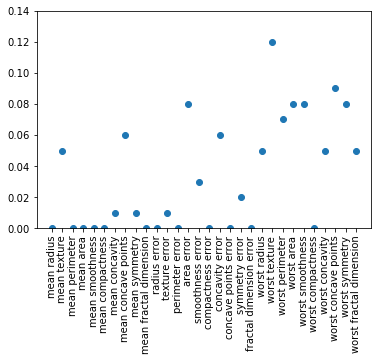

In [79]:
# Both methods of decreasing model complexity decreased the training set accuracy. In this 
# case, lowering `max_depth` provided a significant improvement while lowering the learning
# rate only increaded the generalization performance slightly.

# Similarly to other decision tree based models, as it is impractical to inspect all
# trees, the feature importances can be visualized in order to get some insight about the model.

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)


plt.plot(gbrt.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(0, 0.14)
plt.show()

# The features importances of the gradient boosted trees are somewhat similar to the
# ones of the random forests, though gradient boosted completely ignored some features.

In [80]:
# `xgboost` package: worth looking to apply gradient boosting to a large scale problem, 
# because it is faster and sometimes easier to tune than the scikit-learn implementation
# of gradient boosting on many data sets.

# SOME OTHER CONSIDERATIONS ABOUT GRADIENT BOOSTED DECISION TREES

# Gradient boosted decision trees are among the most powerful and widely used 
# models for supervised learning. 

# Main drawback: require careful tuning of the parameters and may take a long time
# to train.

# Similarly to other tree-based models: works well without scaling and on a mixture
# of binary and continuous features. It is also not quite good on high-dimension
# sparse data.

# Important parameters: `n_estimators`, `learning_rate` and `max_depth`.

# Note that `n_estimators` and `learning_rate` are highly interconnected. Low `learning_rate` 
# means more trees (`n_estimators`) are needed to build a model of similar complexity. On the 
# other hand, in contrast to random forests, where higher `n_estimators` is always better, 
# increasing this # parameter in gradient boosting lead to a more complex model, which may 
# lead to over-fitting.

# It is common to fit `n_estimators` depending on time and memory budget and then search over
# different `learning_rate` values. About the parameter `max_depth`, it is usually low for
# gradient boosted models, often not deeper than five splits.

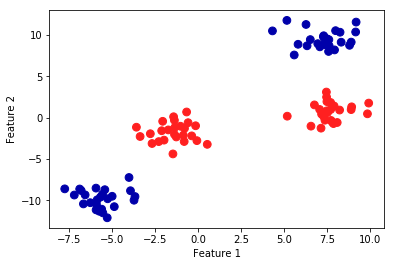

In [81]:
# KERNELIZED SUPPORT VECTOR MACHINES

# Before we have already seen linear support vector machines for classification. Kernelized
# support vector machines (SVMs) are an extension allowing more complex models which are not
# defined simply bu hyperplanes in the input space. SVMs can be use to regression and 
# classification, but here the focus will be the classification case. Similar concepts apply
# to support vector regression.

# The math behind kernelized support vector machines is not be covered here, however the
# discussion is expected to give some intuitions about the idea behind the method.

# LINEAR MODELS AND NON-LINEAR FEATURES

# As lines and hyperplanes have limited flexibility, one can add more features to the model, 
# as polynomials or interactions of the input features. Let's remember the "Tree not monotone"
# figure.

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

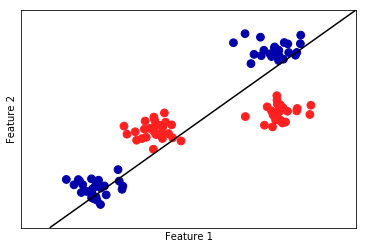

In [82]:
# A linear model will not perform a good job in the data set.

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

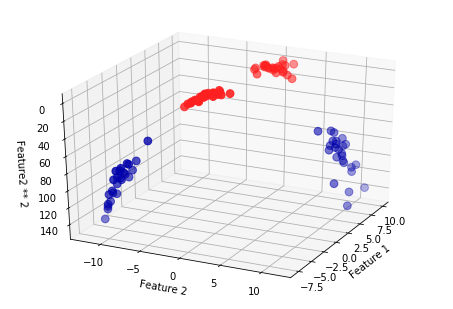

In [83]:
# Let's expand the set of input. We choose to add `feature2 ** 2`, the second feature
# square (now each data point will be represented in a three-dimensional space). The 
# chosen particular feature `feature2 ** 2` is add for illustration purposes, the choice
# itself is not particular important.

# Adding the squared feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# Visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature2 ** 2")
plt.show()


# Make sure to take a look at the stack documentation.

# stack(arrays, axis=0)
#    Join a sequence of arrays along a new axis.
    
#    The `axis` parameter specifies the index of the new axis in the dimensions
#    of the result. For example, if ``axis=0`` it will be the first dimension
#    and if ``axis=-1`` it will be the last dimension.

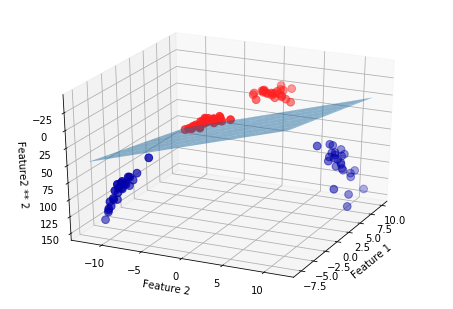

In [84]:
# in the new three-dimensional representation it is possible to separate the red and the 
# blue points using a linear model, which is represented by a plane in three dimensions.

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Show linear decision boundary.
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-25)
xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)

XX, YY = np.meshgrid(xx, yy)
# Hint: ax + by + cz + d= 0. The coefficient are a, b, c and the intercept is d.
ZZ = -(coef[0]*XX + coef[1]*YY + intercept) / coef[2]

ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.5)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature2 ** 2")
plt.show()

# Make sure to take a look at the meshgrid documentation.

# meshgrid(*xi, **kwargs)
#    Return coordinate matrices from coordinate vectors.
    
#    Make N-D coordinate arrays for vectorized evaluations of
#    N-D scalar/vector fields over N-D grids, given
#    one-dimensional coordinate arrays x1, x2,..., xn.

# `meshgrid` is very useful to evaluate functions on a grid.
    
#    >>> x = np.arange(-5, 5, 0.1)
#    >>> y = np.arange(-5, 5, 0.1)
#    >>> xx, yy = meshgrid(x, y, sparse=True)
#    >>> z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
#    >>> h = plt.contourf(x,y,z)

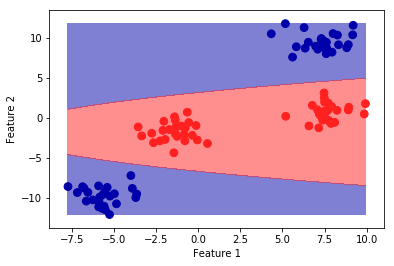

In [85]:
# As a function of the original features, the linear SVM model is not actually linear 
# anymore. Is remembers part of an ellipse.

ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
             cmap=mglearn.cm2, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Make sure to take a look at the contourf documentation.

# contourf(*args, **kwargs)
#    Plot contours.
    
#    :func:`~matplotlib.pyplot.contour` and
#    :func:`~matplotlib.pyplot.contourf` draw contour lines and
#    filled contours, respectively.  Except as noted, function
#    signatures and return values are the same for both versions.

In [86]:
# THE KERNEL TRICK

# By the example above, we see adding non-linear features to the data representation can
# make linear models more powerful. However, sometimes it is difficult to know which 
# features to add and adding many features (like all possible interactions in a 100
# dimensional feature space) might make computation very expensive.

# Kernel trick: a clever mathematical trick that allows us to learn a classifier in 
# a higher dimensional space without actually computing the new, possibly very 
# large representation. 

# The kernel trick works by directly computing the distance (more precisely, the scalar
# products) of the data points for the expanded feature representation, without ever
# actually computing the expansion.

# Two ways to map you data into a higher dimensional space commonly used with support
# vector machines:
# - Polynomial kernel: computes all possible polynomials of the original features up 
# to a certain degree.
# - Gaussian kernel: also known as radial basis function (rbf) kernel. Corresponds to 
# an infinite dimensional feature space. Considers all possible polynomials of all
# degrees and the importance of the features decreases for higher degrees, which follows
# from the Taylor expansion of the exponential map.

# The mathematical details are beyond the scope of this moment, so it will be summarized, 
# in practice, how a SVM with an rbf kernel makes a decision.

In [87]:
# UNDERSTANDING SVMs

# During the training SVM learns how important each of the training data points is to 
# represent the decision boundary between two classes Typically, only a subset of the
# training data points is relevant to defining the decision boundary: the ones lying on
# the border between the classes. These ones are called support vectors.

# To make a prediction for a new point, its distance to the support vectors is measured. 
# The classification decision is made based on the distance to the support vectors and the
# importance of the supported vectors learned during training (stored in `dual_coef_`
# attribute of SVC).

# The distance between two data points measured by the Gaussian kernel is given by:

display(Math(r' k_{\text{rbf}} (x_1, x_2) = \exp(\gamma|| x_1 - x_2 ||^2 )'))

# where
display(Math(r' x_1, x_2'))
# are data points, 
display(Math(r' || x_1 - x_2 ||^2'))
# denotes the Euclidean distance between them and  
Math(r' \gamma')
# is a width parameter of the Gaussian kernel.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

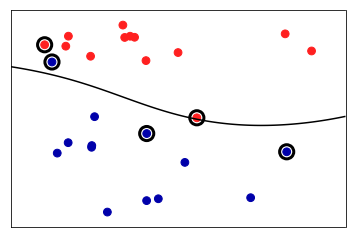

In [88]:
# Below is the result of training an support vector machine on a two-dimensional two-class
# data set. The decision boundary is shown in black and the support vectors are the points
# with black circles.

from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
# Plot data
plt.scatter(X[:, 0], X[:, 1], s=60, c=y, cmap=mglearn.cm2)
# Plot support vectors
sv = svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=200, edgecolors='black', facecolors='none', linewidth=3)
plt.show()

# In this case SVM yields a very smooth and non-linear boundary. There are two parameters
# to be adjusted: `C` and `gamma`.

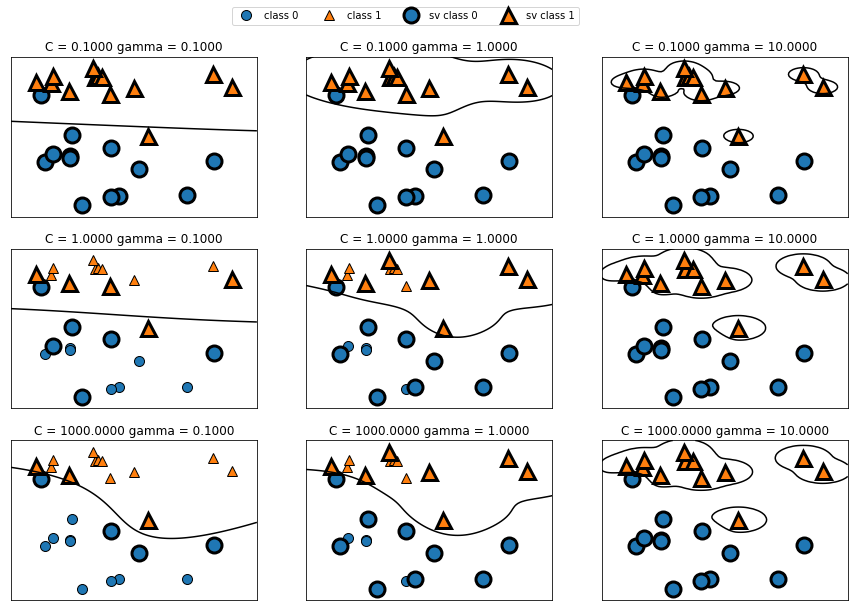

In [89]:
# TUNING SVM PARAMETERS 

# The `gamma` parameter determines the relevant scale of distance between points (the
# "radius" of the Gaussian kernel is actually given by 1/`gamma`. Additionally, C`is
# a regularization parameter. It limits the importance of each point (their dual_coef_).

# We can analyze what happens when we vary these parameters.

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))
plt.show()

# Small `gamma` means large kernel radius: many points are considered to be 
# close-by. This reflects in very smooth decision boundaries on the left, coming
# from low complexity models, while high values of `gamma` yield to more complex
# models, which focus more on single points.

# Similarly to linear models, small `C` means very restricted models, where each
# data point can only have very limited influence. Increasing `C` allows these 
# points to have a stronger influence to to model and the decision boundary bend
# to correctly classify them.

In [90]:
# Applying the rbf kernel to the breast cancer data set with the default 
# values `C=1` and `gamma=1./n_features`.

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [91]:
# The model over-fits quite substantially, with perfet score on the training set
# and only 62% accuracy on the test set.

print("Accuracy on training set: %f" % svc.score(X_train, y_train))
print("Accuracy on test set: %f" % svc.score(X_test, y_test))

Accuracy on training set: 1.000000
Accuracy on test set: 0.629371


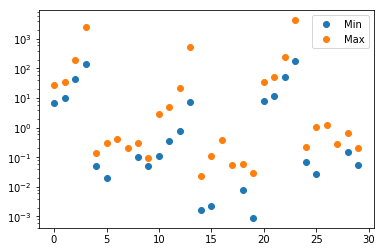

In [92]:
# While SVMs often perform quite well, they are very sensitive to parameters
# settings and to the scaling of the data. Let's take a look at the minimum and 
# maximum values for each feature, plotted in a log-scale.

plt.plot(X_train.min(axis=0), 'o', label="Min")
plt.plot(X_train.max(axis=0), 'o', label="Max")
plt.legend(loc="best")
plt.yscale("log")
plt.show()

# Features in the breast cancer data set are of completely different orders of
# magnitude. This can be somewhat of a problem for other models (like linear
# models), but it has devastating effects for the kernel SVM.

# Pay attention in the role of `axis=0` argument. With this, python searches 
# for maximum and minimum within each feature (local maximum and minimum) and 
# not the maximum and minimum for all features (global maximum and minimum).

In [93]:
# PRE-PROCESSING DATA FOR SVMs

# One way to solve to solve the problem above is rescaling each feature. A common
# rescaling method for kernel SVMs in to scale data such as all features values
# are within the interval [0,1]. This can be done with the `MinMaxScaler` 
# pre-processing method, which will be studied later in the Unsupervised 
# learning chapter. For now, we are going to rescale the data by hand.

# Computing the minimum value per feature on the training set.
min_on_training = X_train.min(axis=0)
# Computing the range of each feature (max-min) on the training set.
range_on_training = (X_train - min_on_training).max(axis=0)

# Subtract the minimum and then divide by the range.
X_train_scaled = (X_train - min_on_training) / range_on_training
# Afterwards `min=0` and `max=1` for each feature.

print("Minimum for each feature \n%s" % X_train_scaled.min(axis=0))
print("Maximum for each feature \n%s" % X_train_scaled.max(axis=0))

Minimum for each feature 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature 
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [94]:
# The same rescaling method can be used to the test set.
min_on_test = X_test.min(axis=0)
range_on_test = (X_test - min_on_test).max(axis=0)
X_test_scaled = (X_test - min_on_test) / range_on_test

# Applying the rbf kernel to the rescaled breast cancer data set with the default 
# values `C=1` and `gamma=1./n_features`.

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("Accuracy on test set: %f" % svc.score(X_test_scaled, y_test))

# Scaling the data made a considerable difference. Now we are actually in an
# under-fitting regime where training and test performance are quite similar.

Accuracy on training set: 0.948357
Accuracy on test set: 0.951049


In [95]:
# We can try to increase either `C` or `gamma` to fit a more complex model.

svc = SVC(C=10)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("Accuracy on test set: %f" % svc.score(X_test_scaled, y_test))

Accuracy on training set: 0.976526
Accuracy on test set: 0.937063


In [96]:
# STRENGTHS, WEAKNESSES AND PARAMETERS

# SVMs allow for very complex decision boundary. They work very well on
# low-dimensional and high-dimensional data (few and many features) but do
# not scale very well with the number of samples. Running on data with up to 
# 10000 samples might work well, but working wth data sets of size 100000 or
# more can be challenging in terms of runtime and memory usage. Another 
# downside is SVMs require careful data pre-processing and tuning of the 
# parameters.

# Because of this reason, SVMs have been replaced in many applications by
# random forests (which require little or no pre-processing). Furthermore, 
# SVMs are hard to inspect and might be quite difficult to understand why
# a particular prediction was made.

# Still it might be worth trying SVMs, particularly if all features represent
# measurements in similar units (i.e. all are pixel intensities) and are 
# on similar scales.

# Finally, we remember `C` and `gamma` control the model complexity. Large
# values in either result in a more complex model. However, they are strongly
# correlated and should be adjusted together.

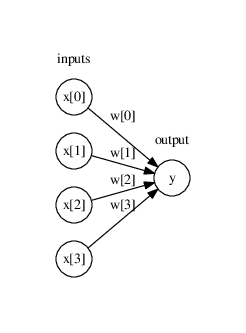

In [97]:
# NEURAL NETWORKS (DEEP LEARNING)

# A family of algorithms known as neural networks has recently seen a revival
# under the name "deep learning".

# While deep learning shows great promise in many machine learning application, 
# many deep learning algorithms are tailored very carefully to a specific use-case.
# Here only simple methods will be discussed, namely multilayer perceptrons for
# classification and regression. Multilayer perceptrons (MLPs) are also known as
# feed-forward neural networks or sometimes just neural networks.

# THE NEURAL NETWORK MODEL 

# MLPs can be viewed as a generalization of linear models which perform multiple
# stages of pre-processing to come a decision. 

# As we have seen before, the prediction by linear regression is given as a 
# sum of the input features, weighted by the learned coefficients. Graphically, 
# this can be visualized as follows, where each node on the left represents 
# an input feature, the connecting lines represents the learned coefficients 
# and the node on the right represents the output.

from graphviz import Digraph
dot = mglearn.plots.plot_logistic_regression_graph()
dot.render('lr_graph.gv')

from wand.image import Image as WImage
WImage(filename='lr_graph.gv.pdf')

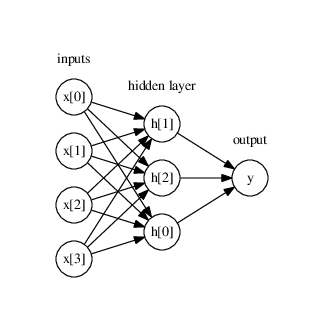

In [98]:
# Computing wighted sums is a process repeated many times in an MLP, first
# computing hidden units that represent an intermediate processing step, which
# are again combined using weighted sum to yield the final result.

from graphviz import Digraph
dot = mglearn.plots.plot_single_hidden_layer_graph()
dot.render('single_hidden_ly.gv')

from wand.image import Image as WImage
WImage(filename='single_hidden_ly.gv.pdf')

# There is much more coefficients to learn: one between every input and every 
# hidden unit and one between every hidden unit and the output.

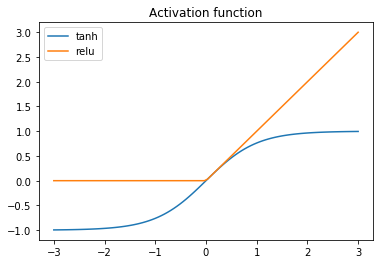

In [99]:
# Mathematically, computing a series of weighted sum is the same as computing
# one weighted sum. Another trick is needed to make this model truly more 
# powerful than a linear model. After computing a weighted sum for each hidden
# unit, a non-linear function is applied to the result, usually the rectifying
# non-linearity (also known as rectified linear unit or relu) or the tangent
# hyperbolic. The result of this function is then used in the weighted sum 
# computing the output.


line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.title('Activation function')
plt.show()

# The relu function cuts off values below zero, while tanh saturates to -1 for
# low input values and +1 for high input values. Either non-linear function
# allows the neural network to learn much more complicated function than a 
# linear model could.

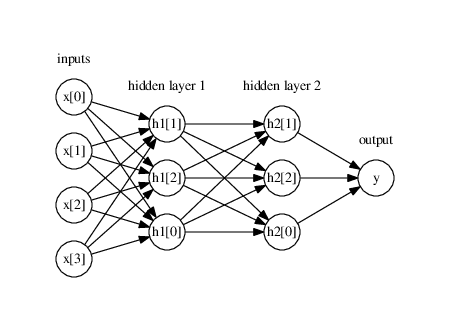

In [100]:
# An important parameter to be set by the user is the number of nodes in the hidden 
# layer and can be as small as 10 for very small or simple data sets or can be
# as big as 10000 for very complex data.

# Is i also possible to add additional hidden layers. Having large neural networks
# made up of these layers of computation is what inspired the term "deep learning".

from graphviz import Digraph
dot = mglearn.plots.plot_two_hidden_layer_graph()
dot.render('two_hidden_ly.gv')

from wand.image import Image as WImage
WImage(filename='two_hidden_ly.gv.pdf')

In [101]:
# TUNING NEURAL NETWORKS

# Applying the MLPClassifier to the `two_moons` data set we saw before.

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, random_state=42)

MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

# Checkout the MLPClassifier documentation to inspect the parameters. The 
# `solver='lbfgs'` will be discussed later.

# The default non-linearity is "relu": activation='relu'. Similarly to the linear
# models, `alpha` is a regularization parameters and is set to `alpha=0.0001`, by
# default. High values of `alpha` means strong regularization.

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

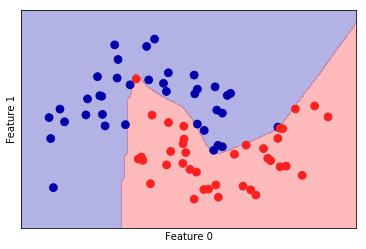

In [102]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

# The neural network learned a very nonlinear but relatively smooth 
# decision boundary.

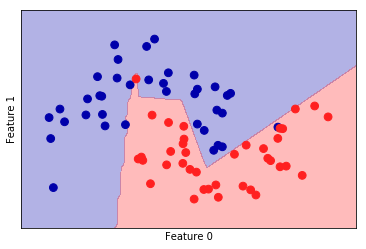

In [103]:
# By default, MLP uses 100 hidden nodes, which is quite a lot for this small data set. We
# can reduce the number (which reduces the complexity of the model) and still get a good
# result.

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

# With 10 hidden units the decision boundary looks somewhat more ragged. If we want a 
# smoother decision boundary, we could either add mode hidden units, as above, add a
# second hidden layer or use the hyperbolic tangent non-linearity.

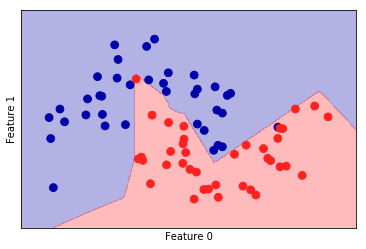

In [104]:
# Two hidden layers with 10 units each.

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

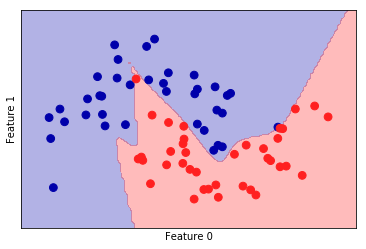

In [105]:
# Two hidden layers with 10 units each and hyperbolic tangent as the non-linearity.

mlp = MLPClassifier(solver='lbfgs', activation='tanh', 
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

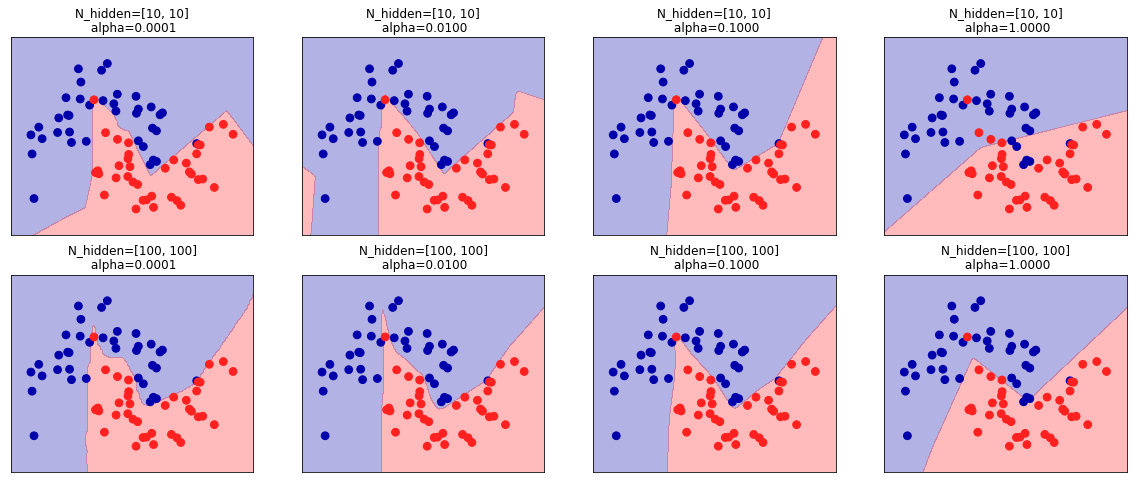

In [106]:
# Similarly to what was done in Ridge Regression and the linear classifiers, we can also
# control the neural network complexity by using a L2 penalty to shrink the weights
# towards zero. This is controlled by the parameter `alpha` and by default is set to 
# a very low value (little regularization).

# Effect of different `alpha` values on the `two_moons` data set, using hidden layers of 10
# or 100 units each.

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], 
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
        ax.set_title("N_hidden=[%d, %d]\n alpha=%.4f" % (n_hidden_nodes, n_hidden_nodes, alpha))
plt.show()

# As the example suggests, there are many ways to control the neural network complexity: the 
# number of hidden layers, the number of units in each hidden layer and the regularization 
# parameter. Actually, there are more, but for now we discuss just these three.

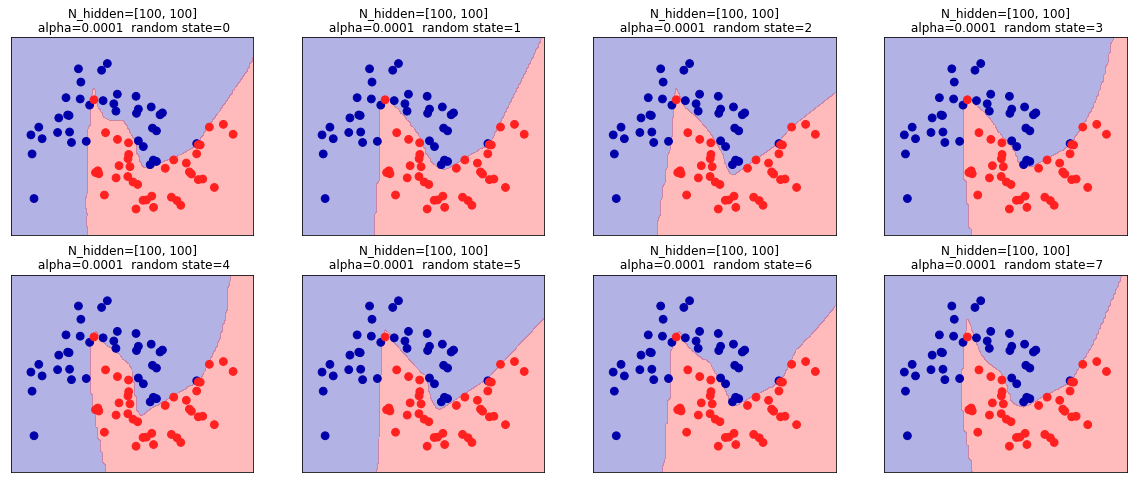

In [107]:
# An important property of neural networks: their weights are set randomly before learning and
# the random initialization affects the learned model. This means even with the same parameter
# settings, one can obtain ery different models by using different random seeds. If the networks
# are large and their complexity is chosen properly this should not considerably affect accuracy, 
# but it is worth to keeping in mind (particularly for small networks).

# Several models, all learned with the same parameter settings, but with different initialization
# seeds.

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
     mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
     mlp.fit(X_train, y_train)
     mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
     ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
     ax.set_title("N_hidden=[%d, %d]\n alpha=%.4f  random state=%d" % 
                  (100, 100, 0.0001, i))
     
plt.show()

In [108]:
# To get a better understand of neural networks on real-world data, we are going to 
# apply MLPClassifier to the breast cancer data set. First, we start with default parameters.

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, random_state=0)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)

# Note the solver default is not `lbfgs`. Keep in mind the argument `max_iter=200`, it will
# be important later.

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [109]:
print("Accuracy on training set: %f" % mlp.score(X_train, y_train))
print("Accuracy on test set: %f" % mlp.score(X_test, y_test))

Accuracy on training set: 0.908451
Accuracy on test set: 0.909091


In [110]:
# The book does not set `random_state` in this example, but we can check this is a 
# mistake, because the model is strongly related with this choice.

mlp = MLPClassifier(random_state=1)
mlp.fit(X_train, y_train)
print("Accuracy on training set: %f" % mlp.score(X_train, y_train))
print("Accuracy on test set: %f" % mlp.score(X_test, y_test))

Accuracy on training set: 0.359155
Accuracy on test set: 0.363636


In [111]:
# Strangely, the different on the accuracies are too large. I do not know why, but if we chose
# solver = 'lbfgs' the results are less sensitive to the initialization seed.

mlp = MLPClassifier(solver='lbfgs', random_state=0)
mlp.fit(X_train, y_train)
print("Accuracy on training set: %f" % mlp.score(X_train, y_train))
print("Accuracy on test set: %f" % mlp.score(X_test, y_test))


mlp = MLPClassifier(solver='lbfgs', random_state=1)
mlp.fit(X_train, y_train)
print("Accuracy on training set: %f" % mlp.score(X_train, y_train))
print("Accuracy on test set: %f" % mlp.score(X_test, y_test))

Accuracy on training set: 0.957746
Accuracy on test set: 0.944056


Accuracy on training set: 0.960094
Accuracy on test set: 0.958042


In [112]:
# The book uses the terrible accuracy result around 0.36 to stress that neural networks, just
# like SVC, expect all input features to vary in a similar way. Ideally, they should have
# mean zero and variance one. 

# By the test we performed above, it seems the `lbfgs` algorithm is not as sensitive to 
# scaling as the `adam` algorithm. Despite of that we will follow the rescaling method 
# proposed by the book. We stress that in the next chapter the tool `StardardScaler` will
# be introduced and rescaling will be performed automatically.

# Mean value per feature on the training set.
mean_on_train = X_train.mean(axis=0)
# Standard deviation of each feature on the training set.
std_on_train = X_train.std(axis=0)
# To rescale the training set to mean zero and variance one, we subtracted the mean and then
# scale the new variable by th inverse of the standard deviation.
X_train_scaled = (X_train - mean_on_train) / std_on_train

# The SAME transformation is used on the test set.
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("Accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

Accuracy on training set: 0.990610
Accuracy on test set: 0.965035


/home/rodrigo/anaconda3/envs/getting_started/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [113]:
# The results are better after scaling and quite competitive. However we got a warning 
# from the model, which is telling us the default maximum number of interaction has
# been reached `max_iter=200`. We should increase the `max_iter` parameter.

mlp = MLPClassifier(random_state=0, max_iter=1000)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("Accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

Accuracy on training set: 0.992958
Accuracy on test set: 0.972028


In [114]:
# The warning above about the `max_iter` is somehow part of the `adam` algorithm. Is
# is not a problem for the `lbfgs` algorithm.

mlp = MLPClassifier(random_state=0, solver='lbfgs')
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("Accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

# On the other hand the model is clearly over-fitting the training set.

Accuracy on training set: 1.000000
Accuracy on test set: 0.951049


In [115]:
# Despite of the specific over-fit mentioned in the cell above, one might try to increase
# regularization parameter `alpha` in order to get better generalization performance.

mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=1)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("Accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

Accuracy on training set: 0.988263
Accuracy on test set: 0.972028


In [116]:
# We might have noticed many of the well performing models achieved exactly the same 0.972
# accuracy. This means all of them made exactly the same number of mistakes, which is four.

mlp.predict(X_test_scaled) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [117]:
# If we compare the actual predictions, we could see they make the exactly same mistakes. This
# might be either a consequence of data being very small or because these points are really
# different form the rest.

np.where((mlp.predict(X_test_scaled) == y_test) == False)

(array([ 13,  92, 108, 109]),)

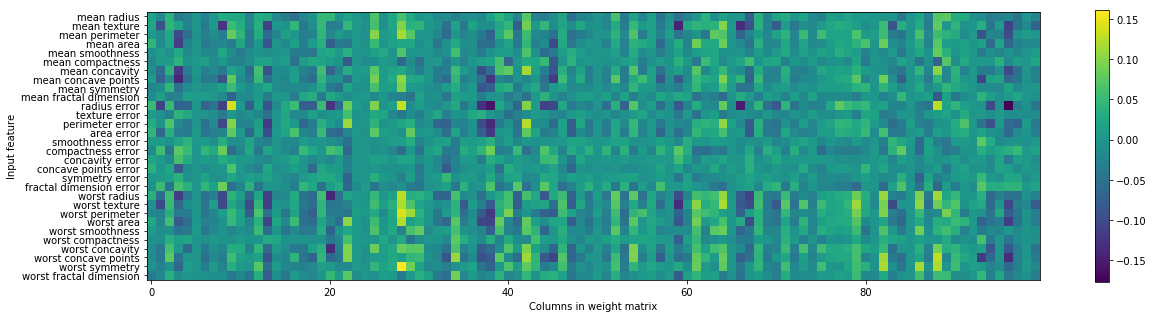

In [118]:
# While it is possible to analyze a learned neural network, it is usually trickier than 
# analyzing a linear model or a tree-based model. One way to introspect what was learned is to
# look at the weights in the model. However, for the breast cancer data set this might be 
# a little difficult to understand (there is another example in the scikit-learn gallery website)

# The plot below shows the learned weights connecting the input to the first hidden layer (with
# 100 hidden units).

# The rows correspond to the 30 input features, while the columns to the 100 hidden units.

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

# A possible inference is that features with very small weights for all the hidden units are
# "less important" to the model. Then somebody interested in this interpretation, could 
# search for such regions in the plot below.

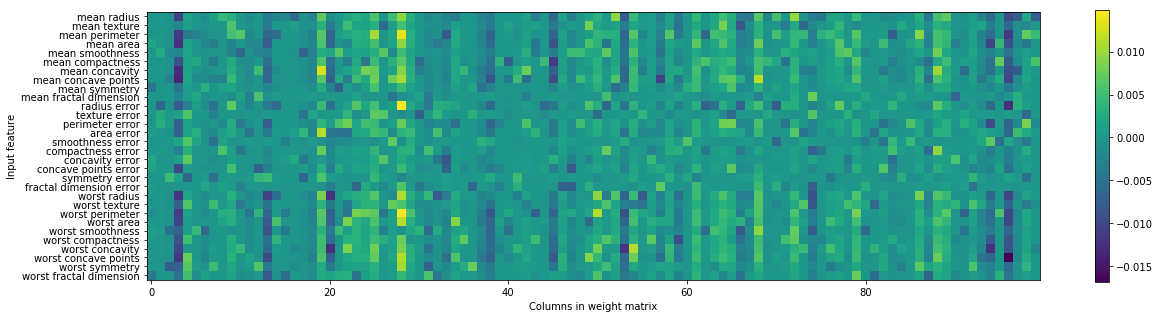

In [119]:
# However such regions are not well defined above. Perhaps it would be interested to increase
# regularization to determine which features are "less important".

mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=100)
mlp.fit(X_train_scaled, y_train)

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

In [120]:
# While MPLClassifier and MLPRegressor provide easy to use interfaces for the most 
# common neural network architectures, they capture only a small subset of what is possible
# with neural networks. More flexible or larger models are found beyond scikit-learn in
# other libraries such as keras, lasagna and tensor-flow.

# All these popular deep learning libraries are more flexible and fast. They also allow
# the use of high-performance graphic processing units (GPUs), which scikit-learn does
# not support. Using GPUs allows to accelerate computations by factors of 10x to 100x and
# are essential for applying deep learning methods to large-scales data sets.

In [121]:
# STRENGTHS, WEAKNESSES AND PARAMETERS

# Neural networks are able to capture information contained in large amounts of data 
# and build incredibly complex models. Given enough computation time, data and careful
# tuning of the parameters, they often beat other machine learning algorithms
# for classification and regression tasks. However, neural networks, in particular the 
# large and powerful ones, often take a long time to train. They also require data 
# pre-processing. Similarly to SVMs, they work best with "homogeneous" data, where
# all features have similar meanings. Tree-based models might work better for data with
# different kinds of features.

# Tuning neural network parameters is also an art onto itself. In the above examples we 
# barely scratched the surface of possible ways to adjust neural network models and to 
# train then.

# ESTIMATING COMPLEXITY IN NEURAL NETWORKS

# The most important parameters: number of layers and number of hidden units per layer. 
# One should start with one or two hidden layers and possible expand from there. The
# number of nodes per hidden layer is often around the number of input features, but 
# rarely higher than in the low to mid thousands.

# Helpful measure for the model complexity: number of learned weights or coefficients.

# Binary classification data set with 100 features and 100 hidden units:
# 100 x 100 = 10,000 weights between and first layer.
# 100 x 1 = 100 weights between hidden layer and output.
# Total = 10,000 + 100 = 10,100 weights.
# If we add a second layer with 100 hidden units we have to add 100 x 100 = 10,000 weights.
# Total: 20,100 weights.

# Binary classification data set with 100 features and 1000 hidden units:
# 100 x 1,000 = 100,000 weights between and first layer.
# 1,000 x 1 = 1,000 weights between hidden layer and output.
# Total = 100,000 + 1,000 = 101,000 weights.
# If we add a second layer with 1,000 hidden units we have to add 1,000x1,000=1,000,000 weights.
# Total: 1,101,00 weights.
# (about 50 times larges than the model with two hidden layers of size 100)

# Common way to adjust parameters: first create a network large enough to over-fit, making 
# sure the task can be learned by the network. Then either shrink the network or add
# regularization, which will improve generalization performance.

# Two easy-to-use choices for the `solver` parameter:
# `adam`: default, works well in most of the situations, but is quite sensitive to scaling.
# `lbfgs`: quite robust, mut might take a long time on larger models or larger data sets.

# More advanced choice for the `solver` parameter:
# `sgd`: used by many deep learning researchers. It comes with additional tuning parameters.

In [122]:
# UNCERTAINTY ESTIMATES FROM CLASSIFIERS

# In the scikit-learn interface the classifiers can provide uncertainty estimates of
# predictions. Often the interest is not only which class a classifier predicts, but
# also how certain it is this is the right class.

# Two functions in scikit-leaern to obtain uncertainty estimates from classifiers:
# - `decision_function`
# - `predict_proba`
# Not all, but most classifiers have ate least one of them.

# Example: `GradientBoostingClassifier` in a synthetic two-dimensional data set.

# Create and split a synthetic data set.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0])

In [123]:
# For illustration purposes, the classes are renamed as 'blue' and 'red'.

y_named = np.array(['blue', 'red'])[y]
y_named

array(['red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'red',
       'red', 'red', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue',
       'red', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'red',
       'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue',
       'blue', 'red', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'red',
       'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue',
       'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'red',
       'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue',
       'red', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'red',
       'blue', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'blue',
       'blue'], 
      dtype='<U4')

In [124]:
# We can call train test split with arbitrary many arrays and all will
# be split in a consistent manner.

X_train, X_test, y_train_named, y_test_named, \
                   y_train, y_test = train_test_split(X, y_named, y, random_state=0)

In [125]:
# Building the gradient boosting model.

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [126]:
# THE DECISION FUNCTION

# The return value of `decision function` for binary classification case is of 
# shape (n_sampes, ). It returns one floating point number for each sample.

X_test.shape

(25, 2)

In [127]:
gbrt.decision_function(X_test).shape

(25,)

In [128]:
# The first few entries of `decision function`.

gbrt.decision_function(X_test)[:6]

array([ 4.13592629, -1.7016989 , -3.95106099, -3.62599351,  4.28986668,
        3.66166106])

In [129]:
# Positive values indicate preference for the "positive" class (red in this case),  while 
# the negative ones refer to preference for the "negative class" (blue in this case).

print(gbrt.decision_function(X_test) > 0)
print(gbrt.predict(X_test))

[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [130]:
# In fact, for binary classification we can recover the prediction by looking only at 
# the decision function sign.

# Remember that for binary classification the "negative" class is always the first entry
# of the `classes_` attribute, while the "positive" class in the second. Then, if we 
# want to fully recover the output of `predict`, we can make use of the `classes_` 
# attribute.

gbrt.classes_

array(['blue', 'red'], 
      dtype='<U4')

In [131]:
# First, we turn the boolean False/True to 0/1.

binary_decision = (gbrt.decision_function(X_test) > 0).astype(int)
binary_decision

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0])

In [132]:
# Then we use 0 and 1 as indices into `classes_`.

pred_decision = gbrt.classes_[binary_decision]
pred_decision

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], 
      dtype='<U4')

In [133]:
# Note the array `pred_decision` is equal to the output of `gbrt.predict`.

np.all(pred_decision == gbrt.predict(X_test))

True

In [134]:
# The range of `decision_function` can be arbitrary and depends on the data and the model
# parameters. Often, because this arbitrary scaling, the output is hard to interpret.

np.min(gbrt.decision_function(X_test)), np.max(gbrt.decision_function(X_test))

(-7.6909717730121798, 4.289866676868515)

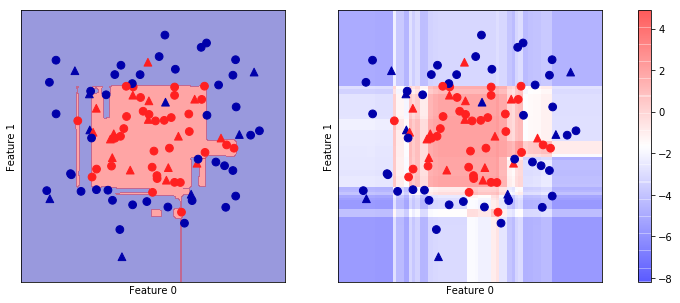

In [135]:
# Below we plot the `decision_function` for all points in a plane using a color coding, next
# to a visualization of the decision boundary. The training points are shown as circles, 
# while the test data as triangles.

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm='bwr')

for ax in axes:
    a = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60, marker='o')
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

# We try to encode not only the predicted outcome, but also how certain the classifier is 
# provides additional information. However, in this visualization, it is hard to make out
# the boundary between the two classes.

In [136]:
# PREDICTING PROBABILITIES

# The output of `predict_proba` is the probability for each class and is often more
# easily understood. For binary classification, its shape is always `(n_sampls, 2)`.

gbrt.predict_proba(X_test).shape

(25, 2)

In [137]:
# The first entry in each row in the estimated probability of the first class, while the
# second entry is the estimated probability of the second class.

gbrt.predict_proba(X_test)[:6]

# Note in this example, for this six samples, the classifier is relatively certain for most 
# points. The uncertainty in the prediction reflects uncertainty in the data and depends on 
# the model and the parameters.

array([[ 0.01573626,  0.98426374],
       [ 0.84575649,  0.15424351],
       [ 0.98112869,  0.01887131],
       [ 0.97406775,  0.02593225],
       [ 0.01352142,  0.98647858],
       [ 0.02504637,  0.97495363]])

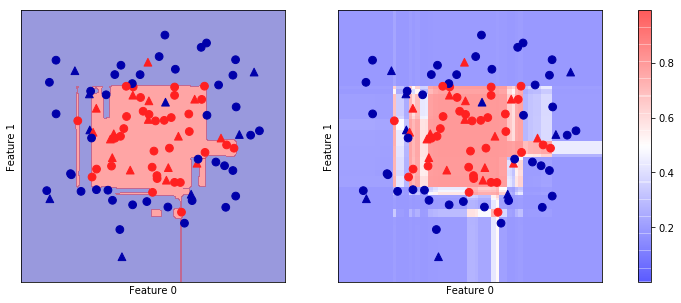

In [138]:
# Naturally, a model which is more over-fit tends to make more certain predictions, even if they
# might be wrong. On the other hand, less complex model usually in more uncertainty in predictions.

# A model is called calibrated if the reported uncertainty actually matches how correct it is - 
# in a calibrated model, a prediction made with 70% certainty would be correct 70% of the time.

# Below we show again the decision boundary on the data set, next to the class probabilities. 

fig, axes = plt.subplots(1, 2, figsize = (13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], 
                                            alpha=.4, cm='bwr', function='predict_proba')

for ax in axes:
    a = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60, marker='o')
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

# The boundaries in this plot are much more well defined and the small areas of uncertainty are
# clearly visible.

The [scikit-learn website](http://scikit-learn.org/stable/auto_examples/index.html#classification) has a great comparison of many models and how they uncertanty estimates look like. Below, for illustration purposes we reproduce one the 
[examples](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py), which should be studied in detail later.

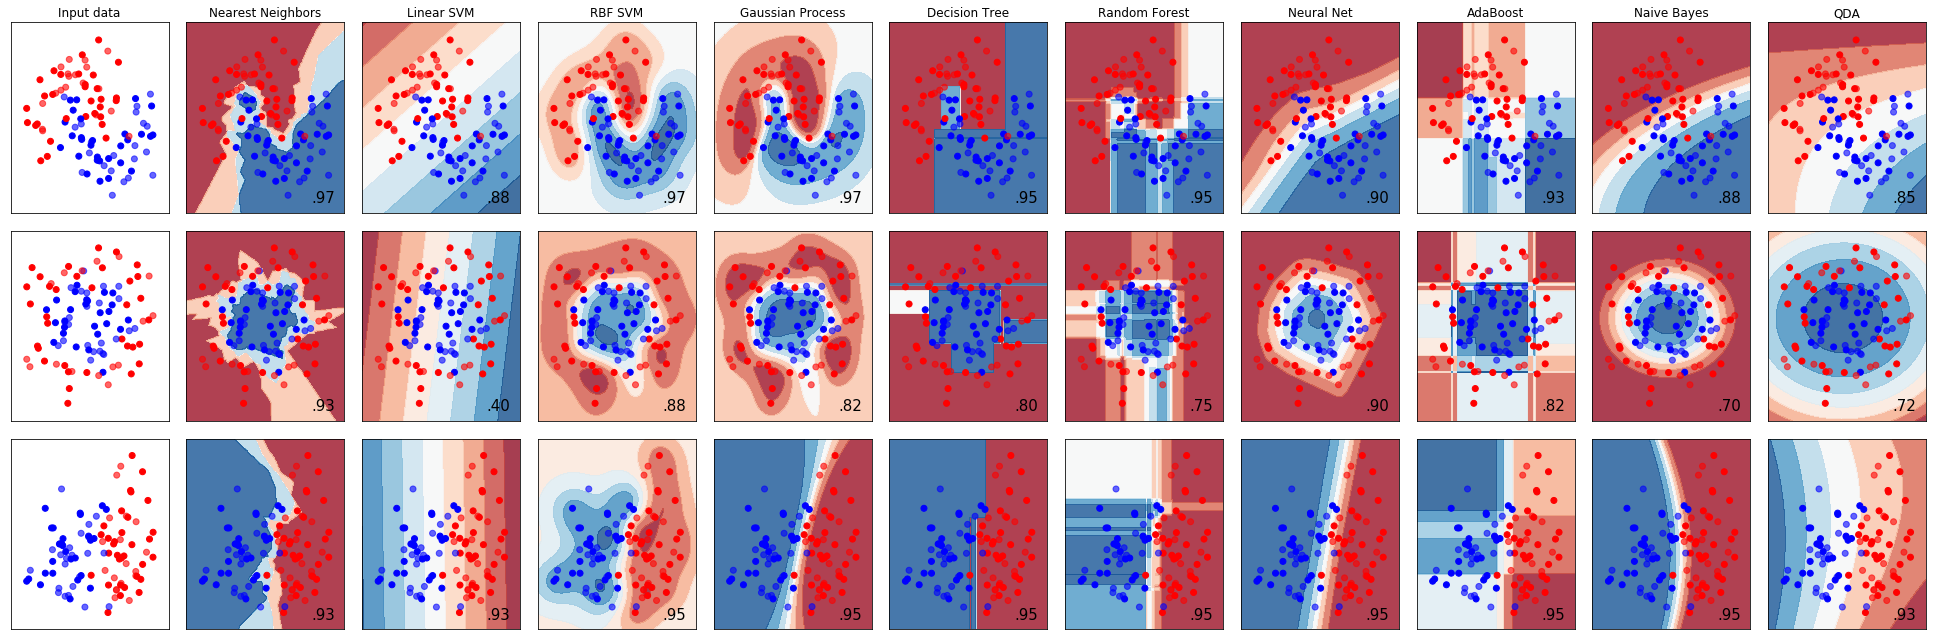

In [139]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# Taken from the scikit-learn website.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [140]:
# UNCERTAINTY IN MULTI-CLASS CLASSIFICATION

# Now we are going to take a look at `decision_function` and `predict-proba` methods
# for multi-class classification. We are going to use the three-class classification
# `iris` data set.

from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [141]:
# Now the `decision_function`shape is `(n_samples, n_class)`.

gbrt.decision_function(X_test).shape

(38, 3)

In [142]:
# Each column provides a "certain score" for each class, where a large score means the 
# class is more likely and small score less likely. 

gbrt.decision_function(X_test)[:6, :]

array([[-0.52931069,  1.46560359, -0.50448467],
       [ 1.51154215, -0.49561142, -0.50310736],
       [-0.52379401, -0.4676268 ,  1.51953786],
       [-0.52931069,  1.46560359, -0.50448467],
       [-0.53107259,  1.28190451,  0.21510024],
       [ 1.51154215, -0.49561142, -0.50310736]])

In [143]:
# Again the prediction from those scores can be recovered.

np.argmax(gbrt.decision_function(X_test), axis=1)

# Documentation for the numpy `argmax`: Returns the indices of the maximum values along an axis.

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [144]:
gbrt.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [145]:
np.all(np.argmax(gbrt.decision_function(X_test), axis=1) == gbrt.predict(X_test))

True

In [146]:
# The output of `predict_proba`has naturally the same shape `(n_samples, n_classes)

gbrt.predict_proba(X_test)[:6]

array([[ 0.10664722,  0.7840248 ,  0.10932798],
       [ 0.78880668,  0.10599243,  0.10520089],
       [ 0.10231173,  0.10822274,  0.78946553],
       [ 0.10664722,  0.7840248 ,  0.10932798],
       [ 0.10825347,  0.66344934,  0.22829719],
       [ 0.78880668,  0.10599243,  0.10520089]])

In [147]:
# As expected, because `predict_proba` deals with probabilities , for each sample the sum
# sum of the columns is one.

gbrt.predict_proba(X_test)[:6].sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.])

In [148]:
# Similarly to what we did with `decision_function`, we can recover the predictions by
# computing the `argmax`of `predict_proba`.

np.all(np.argmax(gbrt.predict_proba(X_test), axis=1) == gbrt.predict(X_test))

True

In [148]:
# SUMMARY AND OUTLOOK

# - Nearest neighbors: for small data sets, good as a baseline, easy to explain.

# - Linear models: go-to as a first algorithm to try, good for very large data sets, 
# good for very high-dimensional data.

# - Naive Bayes: only for classification. Even faster than linear models, good for large, 
# high-dimensional data. Often less accurate than linear models.

# - Decision trees: very fast, do not need data scaling, can be visualized and easily explained.

# - Random forests: nearly always perform better than a single decision tree, very robust and
# powerful. Do not need data scaling. Not good for very high-dimensional sparse data.

# - Gradient Boosted Decision Trees: often slightly more accurate than random forest. Slower to
# train but faster to predict than random forest, and smaller in memory. Need more parameter 
# tuning than random forest.

# - Support Vector Machines: powerful for medium-sized data sets of features with similar 
# meaning. Needs data scaling, sensitive to parameters.

# - Neural Networks: can build very complex models, in particular for large data sets. Sensitive
# to data scaling and to parameters choice. Large models need a long time to train.

# When working with a new data set, it is a good idea to start with a simple model, such as a 
# linear model, naive Bayes or nearest neighbors and see how far you can get. After 
# understanding more about the data, one can consider moving to an algorithm that can build more
# complex models, such as random forests, gradient boosting, SVMs or neural networks.